### Read a grayscale image and perform Compare different edge detection algorithms implemented in spatial domain.  

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Loading the original Image

shape of the original image: (269, 221)


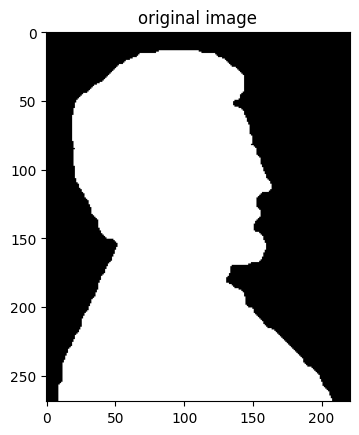

min pixel intensity: 0
max pixel intensity: 255


In [2]:
original_image = cv2.imread('./images/Lincoln.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Zero Padding

In [5]:
def zero_padding(image, pad):
    height, width = image.shape
    padded_image = np.zeros((height+2*pad, width+2*pad), dtype=np.uint8)
    padded_image[pad:pad+height, pad:pad+width] = image
    return padded_image

### Function for Edge Detection 

In [18]:
def edge_detection(image, kernel_x, kernel_y, padded_image):
    #Get Kernel Size
    k_height, k_width = kernel_x.shape
    #initialize gradient images
    Gx = np.zeros_like(image, dtype=float)
    Gy = np.zeros_like(image, dtype=float)
    
    #convolution 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            local_window = padded_image[i:i+k_height, j:j+k_width]
            Gx[i, j] = np.sum(local_window*kernel_x)
            Gy[i, j] = np.sum(local_window*kernel_y)
            
    #calculate gradient magnitude
    G = np.sqrt(Gx**2 + Gy**2)
    
    #Normalize to 0-255
    G = (G/np.max(G))*255
    return G.astype(np.uint8)        

### Applying Sobel Operator

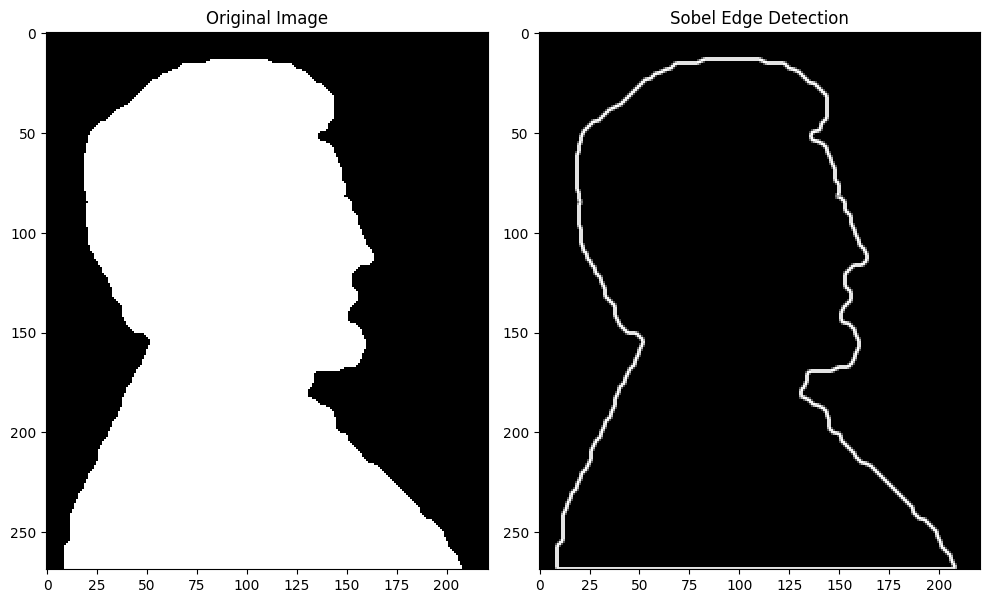

In [19]:
#Define Sobel Kernel
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=int)
sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]], dtype=int)

padded_image = zero_padding(original_image, 1) # 3x3 kernel , pad = 3//2 = 1

sobel_edges_image = edge_detection(original_image, sobel_x, sobel_y, padded_image)


#Plotting
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(sobel_edges_image, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()

### Applying Prewitt Operator

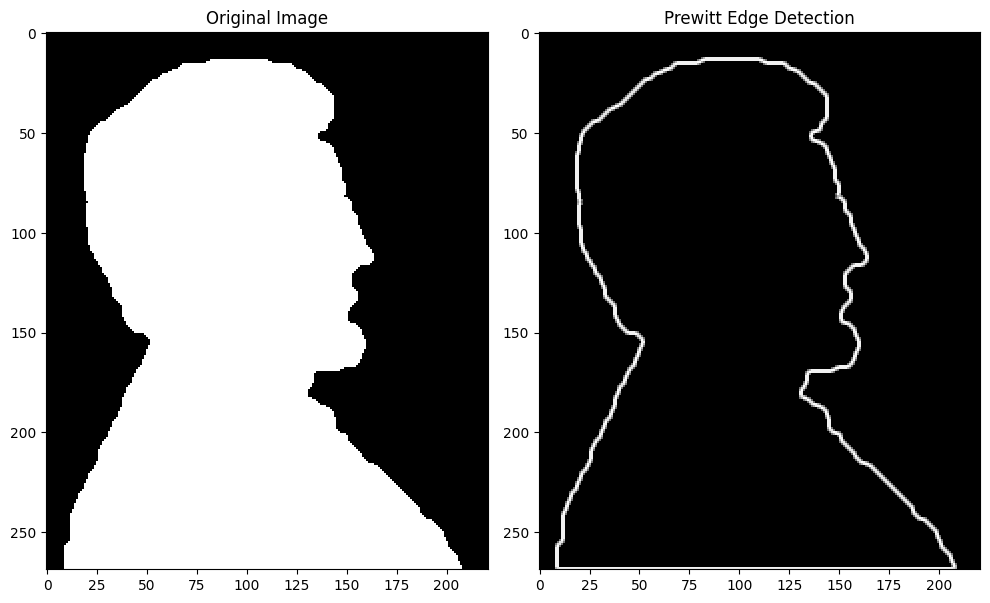

In [20]:
# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]], dtype=int)

prewitt_y = np.array([[-1, -1, -1],
                        [0,  0,  0],
                        [1,  1,  1]], dtype=int)

padded_image = zero_padding(original_image, 1) # 3x3 kernel , pad = 3//2 = 1

prewitt_edges_image = edge_detection(original_image, prewitt_x, prewitt_y, padded_image)


#Plotting
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(prewitt_edges_image, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.tight_layout()
plt.show()

### Applying Roberts Cross Operator

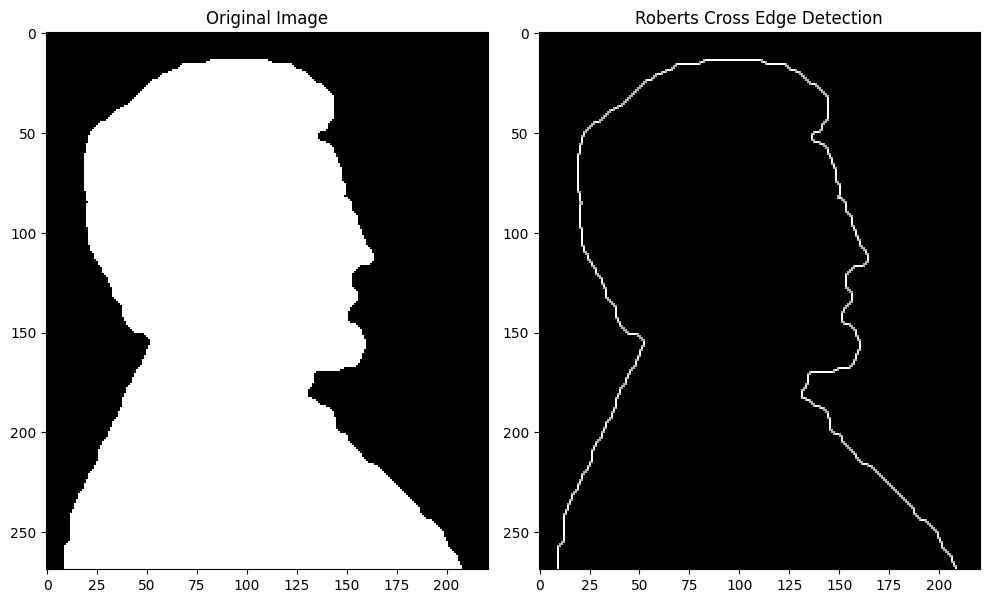

In [24]:
#Define Roberts Cross Kernel
roberts_x = np.array([[1, 0],
                    [0, -1]], dtype=int)

roberts_y = np.array([[0, 1],
                    [-1, 0]], dtype=int)


padded_image = zero_padding(original_image, 1) # 2x2 kernel , pad = 2//2 = 1

roberts_edges_image = edge_detection(original_image, roberts_x, roberts_y, padded_image)


#Plotting
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(roberts_edges_image, cmap='gray')
plt.title('Roberts Cross Edge Detection')

plt.tight_layout()
plt.show()

### Comparing Differents Edge Detection Algorithms

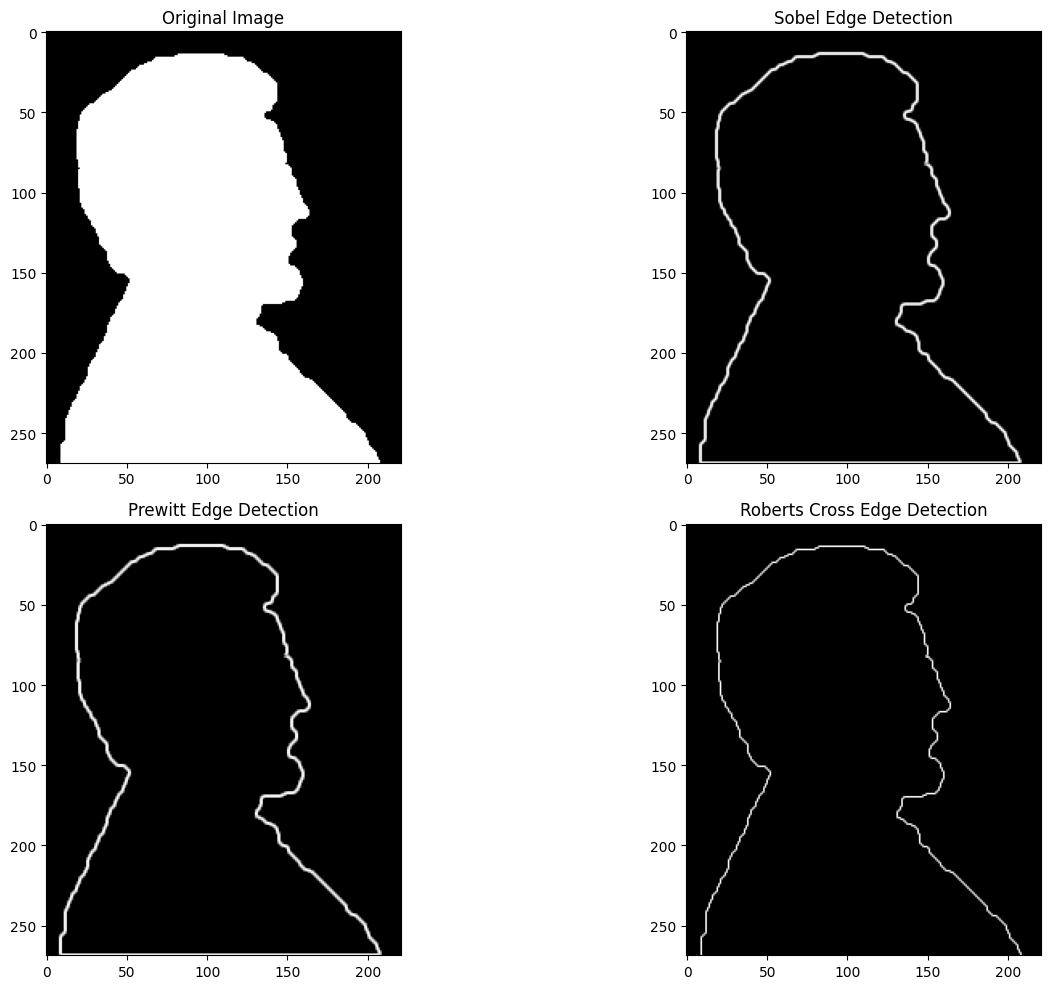

In [26]:
#Plotting
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(2,2,2)
plt.imshow(sobel_edges_image, cmap='gray')
plt.title('Sobel Edge Detection')

plt.subplot(2,2,3)
plt.imshow(prewitt_edges_image, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.subplot(2,2,4)
plt.imshow(roberts_edges_image, cmap='gray')
plt.title('Roberts Cross Edge Detection')

plt.tight_layout()
plt.show()